Rezumate pentru texte

* Definirea problemei:
- input = text pentru rezumare (string) - 2 featureuri: category, contect (text pt rezumare)
- output = rezumat pentru textul dat input (string)
- invatare supervizata: problema de regresie (seq2seq)

* Analiza datelor de intrare:
- categoria: guvern
- 2 feature-uri: category, content
- tip date: textuale

Incarcarea datelor de intrare

In [2]:
from datasets import load_dataset

dataset = load_dataset("readerbench/ro-text-summarization")
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['Category', 'Title', 'Content', 'Summary', 'href', 'Source'],
        num_rows: 65268
    })
    test: Dataset({
        features: ['Category', 'Title', 'Content', 'Summary', 'href', 'Source'],
        num_rows: 7253
    })
})


Nr. date in baza de date

In [3]:
print(len(dataset['train']))

65268


Extragerea datelor de interes (category: guvern)

In [4]:
data = dataset['train'].filter(
    lambda example: example['Category'] == 'guvern' or example['Category'] == 'educatie' or example[
        'Category'] == 'social')
print(data)  #25259

Filter:   0%|          | 0/65268 [00:00<?, ? examples/s]

Dataset({
    features: ['Category', 'Title', 'Content', 'Summary', 'href', 'Source'],
    num_rows: 35175
})


Nr date dupa filtrare

In [5]:
print(len(data))

35175


Extragerea feature-urilor de interes (category, content)

In [6]:
dataset_guvern = []
dataset_educatie = []
dataset_social = []

for category, content in zip(dataset['train'].data['Category'], dataset['train'].data['Content']):
    if str(category) == "guvern":
        dataset_guvern.append([category, content])
    if str(category) == "educatie":
        dataset_educatie.append([category, content])
    if str(category) == "social":
        dataset_social.append([category, content])

Medie nr. cuvinte per categorie

In [16]:
from numpy import mean

def medie(data_set):
    word_counts = []
    for category, content in data_set:
        words = content.as_py().split()
        word_counts.append(len(words))
    return round(mean(word_counts))

print("Media de cuvinte guvern:", medie(dataset_guvern))
print("Media de cuvinte educatie:", medie(dataset_educatie))
print("Media de cuvinte social:", medie(dataset_social))

Media de cuvinte guvern: 269
Media de cuvinte educatie: 326
Media de cuvinte social: 320


Reprezentarea grafica

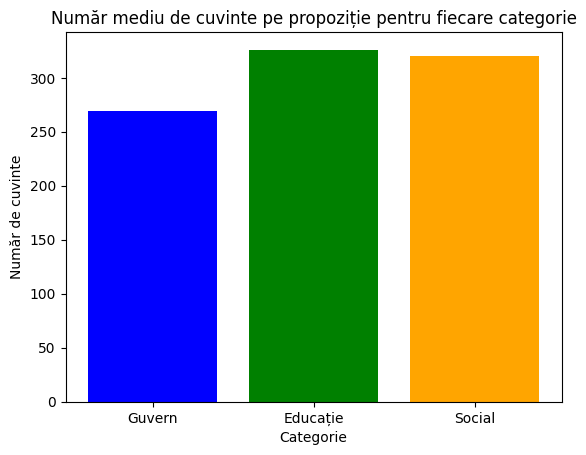

In [22]:
import matplotlib.pyplot as plt

categories = ["Guvern", "Educație", "Social"]
word_counts_per_category = [medie(dataset_guvern), medie(dataset_educatie), medie(dataset_social)]

plt.bar(categories, word_counts_per_category, color=['blue', 'green', 'orange'])
plt.xlabel('Categorie')
plt.ylabel('Număr de cuvinte')
plt.title('Număr mediu de cuvinte pe propoziție pentru fiecare categorie')
plt.show()

Outlieri

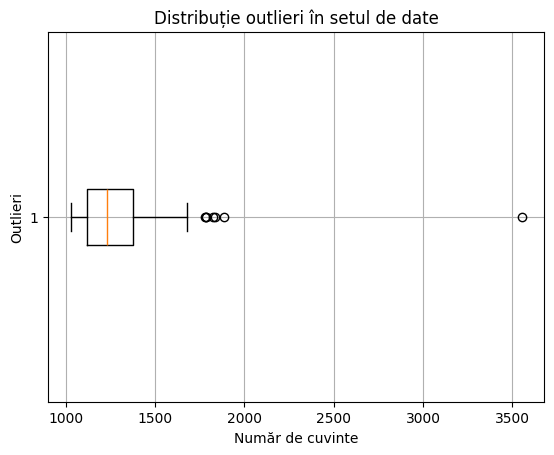

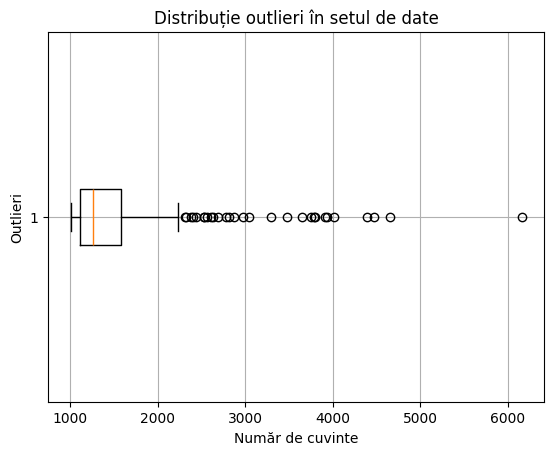

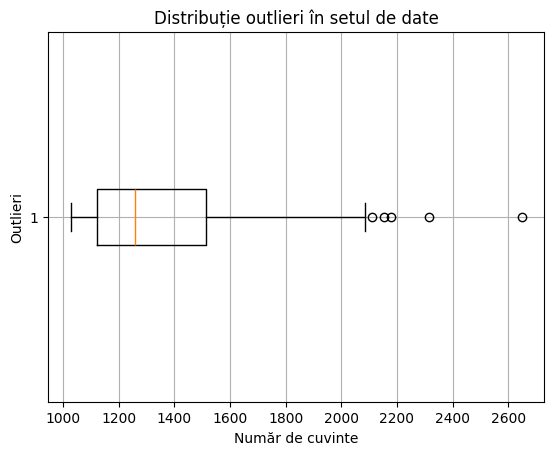

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def distributie_outlieri(data_set):
    average = medie(data_set)
    std_dev = np.std([len(content.as_py().split()) for _, content in data_set]) 

    outliers = [len(content.as_py().split()) for _, content in data_set if len(content.as_py().split()) > average + 3 * std_dev]

    plt.boxplot(outliers, vert=False)
    plt.xlabel('Număr de cuvinte')
    plt.ylabel('Outlieri')
    plt.title('Distribuție outlieri în setul de date')
    plt.grid()
    plt.show()

distributie_outlieri(dataset_educatie)
distributie_outlieri(dataset_guvern)
distributie_outlieri(dataset_social)